# Unsupervised Learning Techniques:


# A. Clustering Algoritms: k-means and DBSCAN:

* Clustering is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.

* Clustering is used in a wide variety of applications, including:
    * Customer segmentation
    * Data analysis
    * Dimensionality reduction
    * Feature engineering
    * Anomaly detection (also called outlier detection)
    * Semi-supervised learning
    * Search engines
    * Image segmentation
    

### A.1 k-means:

* In the context of clustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance; this is not to be confused with the class labels in classification, which are used as targets.

* k-means assigns an instance to a cluster depending on the distance of the instance to the centroid.
    * Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance and the centroid or a similarity score (or affinity), such as the Gaussian radial basis function.
    
* `KMeans` class:
    * `KMeans` instance preserves the predicted labels of the instances it was trained on, available via the `labels_` instance variable.
    * The `transform()` method measures the distance from each instance to every centroid.
        * If you have a highdimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique. Alternatively, you can use these distances as extra features to train another model.
    * The `KMeans` class uses an optimized initialization technique by default.

##### k-means algorithm:

* Start by placing the centroids randomly (e.g., by picking k instances at random from the dataset and using their locations as centroids).
* Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving.
* The algorithm is guaranteed to converge in a finite number of steps (usually quite small). That’s because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it’s guaranteed to converge.
    * Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the **centroid initialization**.
    
* When the data has a clustering structure, the computational complexity of the algorithm is generally linear with regard to the number of instances $m$, the number of clusters $k$, and the number of dimensions $n$. If the data has no clustering structure, the complexity can increase exponentially w/ the number of instances.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create sample data
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_init=15, n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

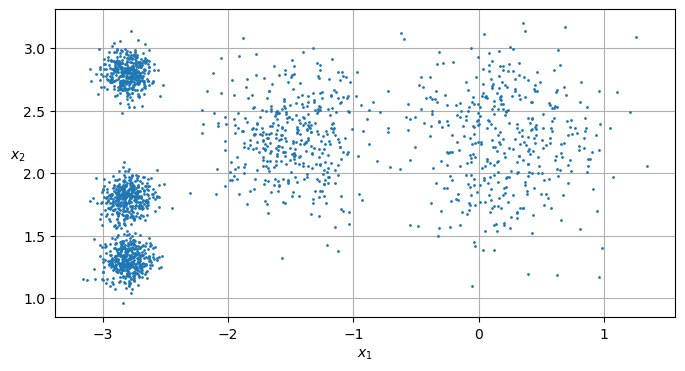

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid();

In [3]:
y_pred

array([0, 4, 1, ..., 3, 1, 4])

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.labels_

array([0, 4, 1, ..., 3, 1, 4])

In [6]:
# Centroids found by the algorithm
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

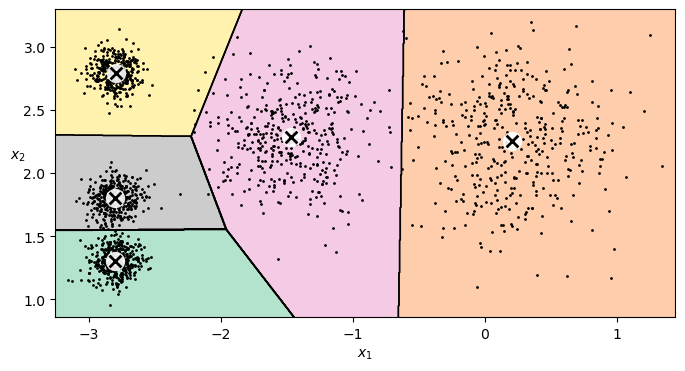

In [8]:
# k-means decision boundaries (Voronoi tessellation)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X);

In [9]:
kmeans.transform(X_new).round(2)

array([[2.89, 0.33, 1.49, 2.9 , 2.81],
       [5.84, 2.8 , 4.48, 5.85, 5.81],
       [1.71, 3.29, 1.69, 0.29, 1.21],
       [1.22, 3.22, 1.55, 0.36, 0.73]])

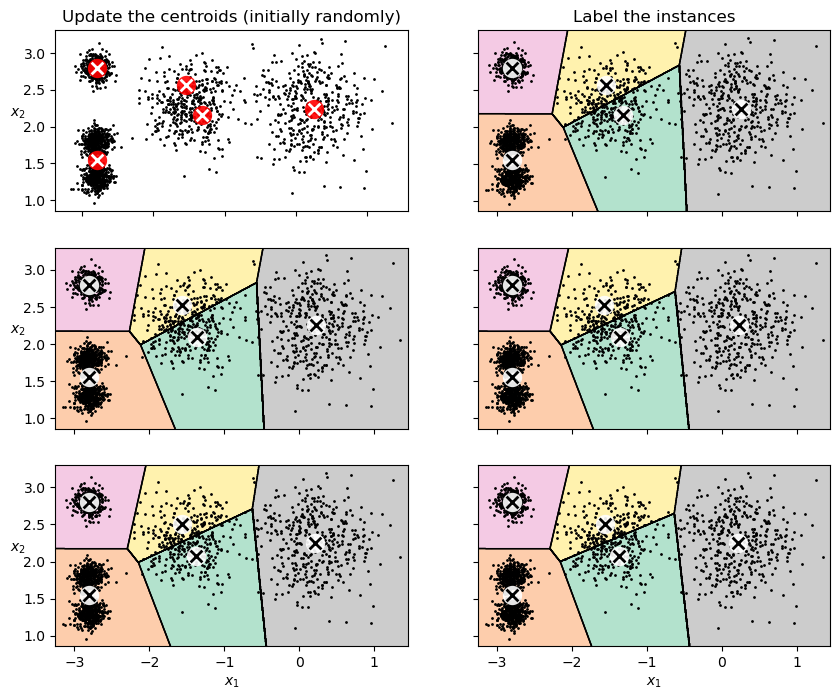

In [10]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

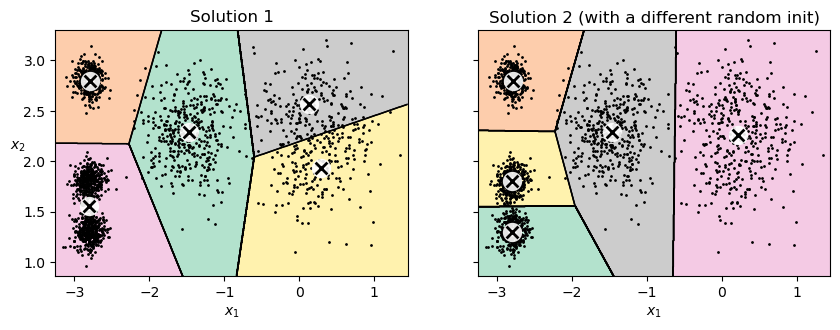

In [11]:
# Running K-Means w/ different random seed
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")


##### Centroid Initialization Methods:

* If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the `init` hyperparameter to a NumPy array containing the list of centroids, and set `n_init` to 1.
* Another solution is to run the algorithm multiple times with different random initializations and keep the best solution:
    * The number of random initializations is controlled by the `n_init` hyperparameter: by default it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call `fit()`, and  Scikit-Learn keeps the best solution.
    * To know the best solution, `KMeans` uses a performance metric called the model's inertia. This inertia is the sum of the squared distances between the instances and their closes centroids. `KMeans` class runs the algorithm `n_init` times and keeps the model w/ the lowest inertia. The models inertial is accessible via the `inertia_` instance variable.
    * The `score()` method returns the negative inertia(a predictor's `score()` method must always respect Scikit-Learn's "greater is better" rule: If a predictor is better than another, its `score()` method should return a greater score).

* **k-means++**:
    * `KMeans` class uses this initialization method by default. (`init="k-means++"`)
    * k-means++ is a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the k-means algorithm much less likely to converge to a suboptimal solution.
    * It makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution.
    * k-means++ initialization algorithm:
        1. Take one centroid, $c^{(i)}$, chosen uniformly at random from the dataset.
        2. Take a new centroid, $c^{(i)}$, choosing an instance, $x^{(i)}$, with probability $\Large \frac{D(x^{(i)})^2}{\sum_{j=1}^mD(x^{(j)})^2}$ :
            * $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen.
            * This probability distribution ensures that the instances farther away from already chosen centroids are much more likely be selected as centroids.
        3. Repeat the previous step until all $k$ centroids have been chosen.

In [12]:
# fitting known centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [13]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336]])

In [14]:
kmeans.inertia_

211.59853725816836

In [15]:
kmeans.score(X)

-211.59853725816836

##### Accelerated k-means and mini-batch k-means:

* Accelerated k-means:
    * On some large datasets w/ many clusters, the algorithm can be accelerated by avoiding many unnecessary distance calculations. Charles Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between 2 points) and by keeping track of lower and upper bounds for distances between instances and centroids.
    * `KMeans(algorithm="elkan")`
    * Does not always accelerate traing, it depends on the dataset.

* Mini-batch k-means:
    * Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. 
    * This speeds up the algorithm (typically by a factor of three to four) and makes it possible to cluster huge datasets that do not fit in memory.
    * Scikit-Learn implements this algorithm in the `MiniBatchKMeans` class.
    * If the dataset does not fit in memory, the simplest option is to use the `memmap` class. Alternatively, you can pass one mini-batch at a time to `partial_fit()` method, but this will require much more work, since you will need to perform multiple initializations and select the best one yourself.
    * Although the mini-batch k-means algorithm is much faster than the regular k-means algorithm, its inertia is generally slightly worse.

In [16]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init='auto')
minibatch_kmeans.fit(X)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, n_init='auto', random_state=42)

In [17]:
minibatch_kmeans.inertia_

211.65945105712612

In [18]:
# Using Minibatches along with memmap
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
import numpy as np

X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

In [20]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_init='auto', n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_memmap)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10, n_init='auto', random_state=42)

1/100

100/100

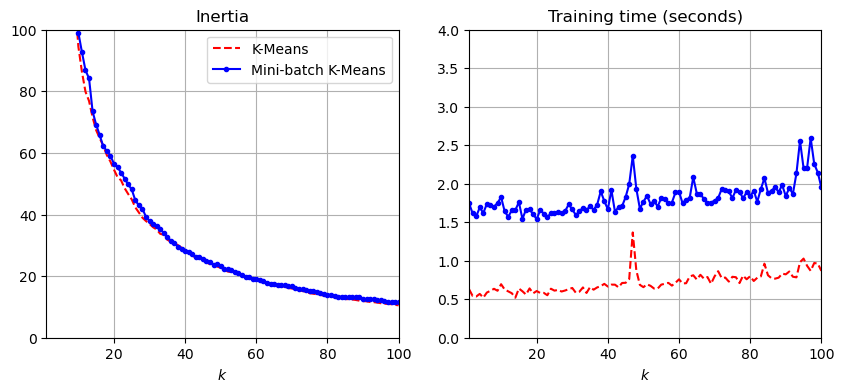

In [21]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_init='auto', n_clusters=k, algorithm="lloyd", random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_init='auto', n_clusters=k,batch_size=1536, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

##### Finding the optimal number of clusters:

* The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k (the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be).

* **Elbow Method**:
    * One way of finding the optimal number of clusters by plotting the inertia as a function of k. 

* **Silhouette Score**:
    * More precise than the elbow method, but also more computationally expensive.
    * Silhouette score is the mean *silhouette coefficient* over all the instances.
    * An instance's silhouette coefficient is equal to $\frac{b-a}{max(a,\ b)}$, where:
        * $a$ is the mean distance to the other instance in the same cluster (i.e., the mean intra-cluster distance)
        * $b$ is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes $b$, excluding the instance's own cluster).
        * Silhouette coefficient can vary between -1 and +1.
        * A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters.
        * A coefficient close to 0 means that it is close to a cluster boundary.
        * A coefficient close to -1 means that the instance may have been assigned to the wrong cluster.
    * Implemented in scikit-learn's `silhouette_score()` function.

* **Silhouette Diagram**:
    * Informative visualization of every instance's silhouette coefficient, sorted by the clusters they are assigned to and by the value of the coefficient.
    * Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances in the cluster, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).
    * The vertical dashed lines represent the mean silhouette score for each number of clusters.
        * When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other cluster.
    * Choose a balance between the silhouette scores and the distribution of the width of he clusters (*knives*)

''

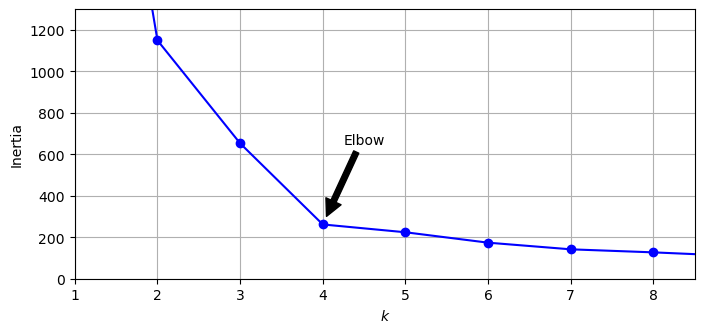

In [22]:
kmeans_per_k = [KMeans(n_init='auto', n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
;

In [23]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_init='auto', n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [24]:
silhouette_scores

[0.5953628624305034,
 0.5723900247411775,
 0.688531617595759,
 0.6267891051050735,
 0.5939826924531691,
 0.6073764342983768,
 0.5458573941676348,
 0.553632752836704]

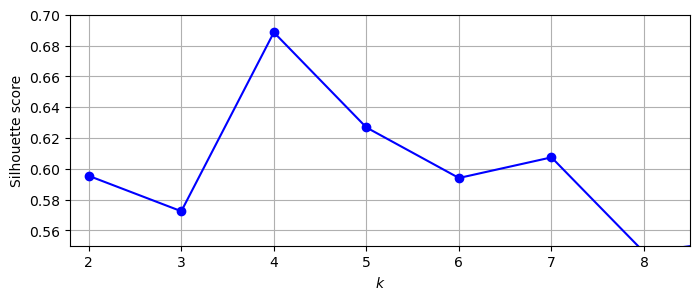

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid();

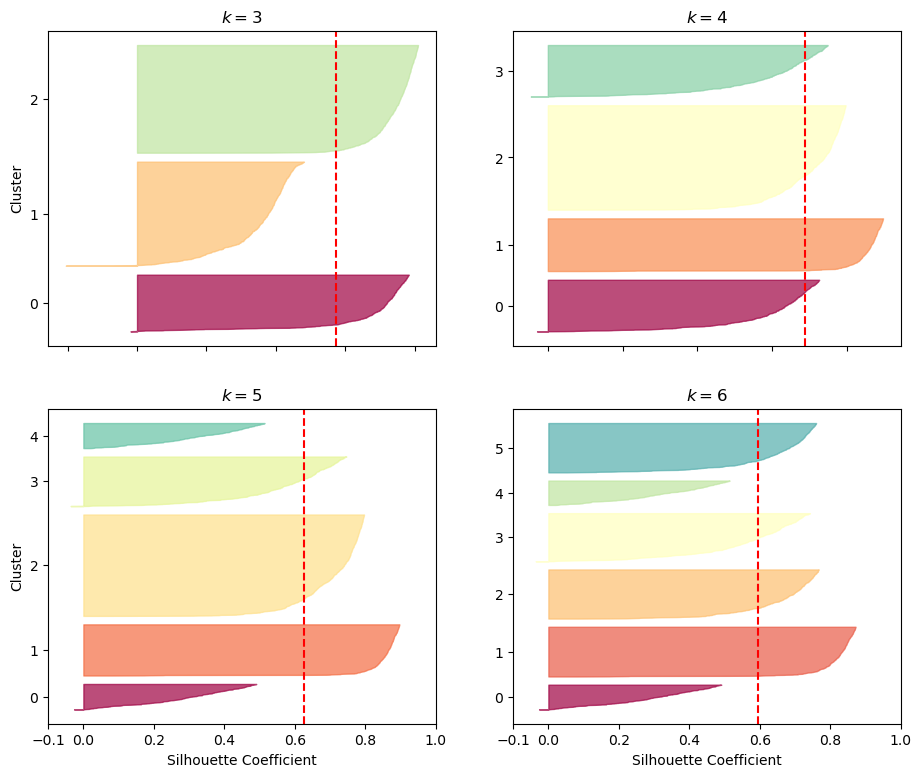

In [26]:
# Silhouette Diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

### A.2. Limits of k-means:

* Despite being fasta and scalable, It is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters.
* k-means does not behave very well when the clusters have varying sizes, different densities, or non spherical shapes.

* So, depending on the data, different clustering algorithms may perform better.

* It is important to scale the input features before you run k-means, or the clusters may be very stretched and k-means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally helps k-means.

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Text(0.5, 1.0, 'Inertia = 2242.4')

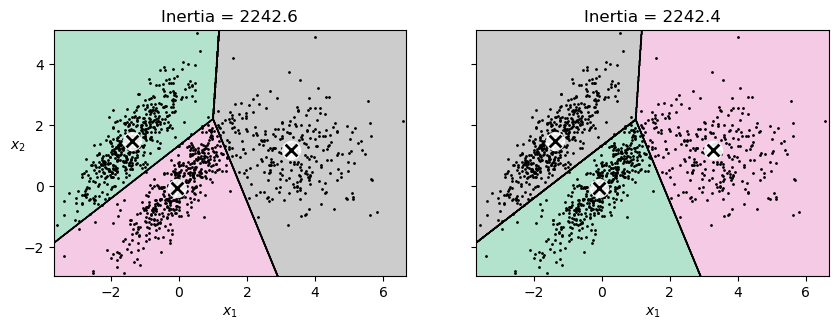

In [27]:
# Limits of k-means on an elongated clusters w/ varying densities:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans( n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_init='auto', n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

### A.3. Using Clustering for Image Segmentation:

* Image segmentation is the task of partitioning an image into multiple segments.
* Variants of Image segmentation:
    * Color Segmentation:
        * Pixels with a similar color get assigned to the same segment.
    * Semantic Segmentation:
        * All pixels that are part of the same object type get assigned to the same segment.
    * Instance Segmentation:
        * All pixels that are part of the individual object are assigned to the same segment.

In [28]:
import PIL

filepath = 'ladybug.png'
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [29]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_init='auto', n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

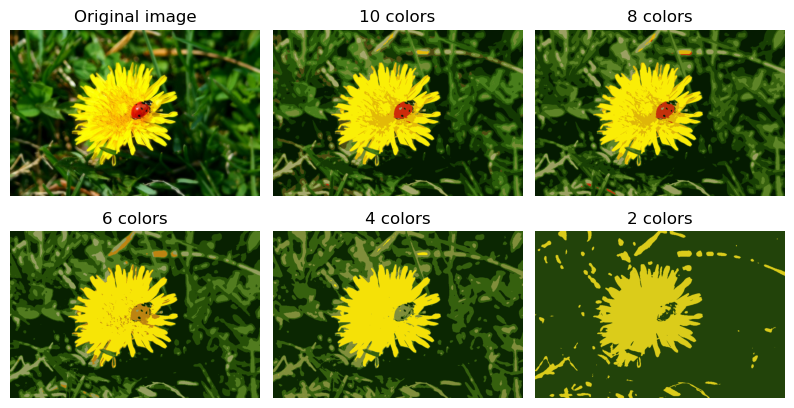

In [30]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_init='auto', n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

### A.4 Using Clustering for Semi-Supervised Learning:

* Scikit-Learn has classes that can propagate labels automatically:
    * `LabelSpreading` and `LabelPropagation` from `sklearn.semi_supervised` package.
        *  Both classes construct a similarity matrix between all the instances, and iteratively propagate labels from labeled instances to similar unlabeled instances.
    * `SelfTrainingClassifier`
        * Give it a base classifier (such as `RandomForestClassifier`) and it trains it on the labeled instances, then uses it to predict labels for the unlabeled samples.
        * It then updates the training set w/ the labels it is most confident about, and repeat this process of training and labeling until it cannot add labels anymore.

* Active Learning:
    * To continue improving your model and your training set, the next step could be to do a few rounds of active learning, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many different strategies for active learning, but one of the most common ones is called **uncertainty sampling** :
    * **Uncertainty Sampling**:
        1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
        2. The instances for which the model is most uncertain (i.e., where its estimated probability is lowest) are given to the expert for labeling.
        3. Iterate this process until the performance improvement stops being worth the labeling effort.
    * Other active learning strategies include labeling the instances that would result in the largest model change or the largest drop in the model’s validation error, or the instances that different models disagree on (e.g., an SVM and a random forest).

In [31]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [32]:
# Test on 50 labeled instances:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7481108312342569

In [33]:
# Test on whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [34]:
# Cluster the training set into 50 clusters
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


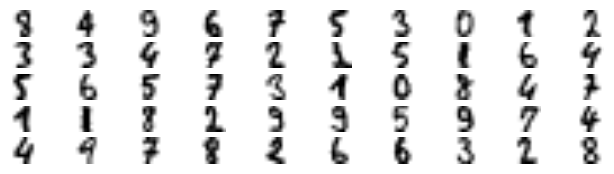

In [35]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

In [36]:
y_representative_digits = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 1,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
    1, 1, 8, 2, 9, 9, 5, 9, 7, 4,
    4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])

# fit the clustered data
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8236775818639799

In [37]:
# Propagate the labels to all other instances in the same cluster

y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.8413098236775819

In [38]:
# Ignore the 1% of instances that are farthest from their cluster center
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.836272040302267

In [39]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.94

### A.5 DBSCAN:

* Density-based Spatial Clustering of Applications w/ noise (DBSCAN) algorithm define clusters as continuous regions of high density.
    * For each instance, the algorithm counts how many instances are located w/in a small distance ,$\epsilon$, from it. This region is called the instance's $\epsilon$-neigborhood.
    * If an instance has at least `min_samples` instances in its $\epsilon$-neigborhood (including itself), then it is considered a **core instance**.
        * **core instances** are those than are located in dense regions.
    * All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
    * Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

* DBSCAN works well if all the clusters are well separated by low-density regions.
    * If the density varies significantly across the clusters, however, or if there’s no sufficiently low-density region around some clusters, DBSCAN can struggle to capture all the clusters properly.
    * Does not scale well to large datasets.
    * Heirarchical DBSCAN
        * `scikit-learn-contrib-project`

* `sklearn.cluster.DBSCAN`:
    * The labels of all the instances are availbale in the `labels_` instance variable:
        * Some instances have a cluster index equal to -1, w/c means that they are considered as anomalies by the algorithm.
    * The indices of the core instances are available in the `core_sample_indices_` instance variable.
    * The core instances are available in the `components_` instance variable.
    * `DBSCAN` does not have a `predict()` method, although it has a `fit_predict()` method.
        * It cannot predict w/c cluster a new instances belong to.

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [47]:
# Labels of all the instances
dbscan.labels_

array([ 4,  0,  1,  2,  3,  2,  2,  0,  4,  5,  2,  3,  2,  6,  5,  2, -1,
        5,  2,  5,  8,  0,  6,  1,  2,  6,  0,  4,  2,  5,  2,  1, -1,  7,
        5,  8,  5, -1,  5,  9,  5,  3,  4,  3,  4,  5,  9,  9,  3,  5, 10,
        1,  2,  4,  6,  4,  4, -1,  5, -1, 11,  6,  4,  5,  8, 12, 12,  2,
       -1, 10, -1,  5, 12,  5,  4,  5, 12,  4,  0, 10,  5,  9,  0, -1,  2,
        6,  5, -1,  8,  2, -1,  8,  5,  2,  5,  1,  2,  1,  5,  3,  5,  0,
        5, -1, -1,  5,  5,  7,  5,  6, 12,  5,  5,  1,  2,  0,  6,  5,  5,
       10,  5, 10,  5,  3,  5,  4, 11,  5,  5,  2,  2, -1,  7,  3,  0, 10,
        3,  5, 11, 11,  3, 12,  4,  2,  2, 10,  5,  0,  5,  8,  5,  5,  1,
       11,  5,  1,  5,  4, 11,  5, 11,  4,  2,  5,  4, -1,  9, 11,  5,  3,
       11,  0,  5,  5, -1, 12,  8, -1,  3,  1,  5, 10,  5,  5,  5,  1,  2,
        5,  9,  4,  5,  0,  4, 10,  4, 10,  4,  8,  8,  2, 11, 12,  8,  4,
        2, 12,  1,  1,  5,  5,  2,  5,  1,  3,  4,  2,  2,  0, 10,  5,  2,
        5,  2,  4,  8,  1

In [48]:
dbscan.core_sample_indices_

array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  15,
        17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,  31,
        33,  35,  38,  39,  40,  41,  42,  43,  44,  45,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  58,  60,  61,  62,  63,  64,
        65,  66,  67,  69,  71,  72,  73,  74,  75,  77,  78,  79,  80,
        82,  84,  86,  88,  89,  91,  92,  93,  95,  96,  97,  98,  99,
       100, 102, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130,
       133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146,
       148, 149, 150, 151, 152, 153, 154, 156, 157, 159, 160, 161, 162,
       163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 176, 178, 179,
       181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 209,
       210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 222, 22

In [49]:
dbscan.components_

array([[ 0.22599225, -0.03876994],
       [ 0.79257255, -0.51705225],
       [-0.35647897,  0.86591057],
       ...,
       [ 0.0213798 ,  0.31000624],
       [ 0.99629701, -0.42915455],
       [ 0.44164623,  0.89381119]])

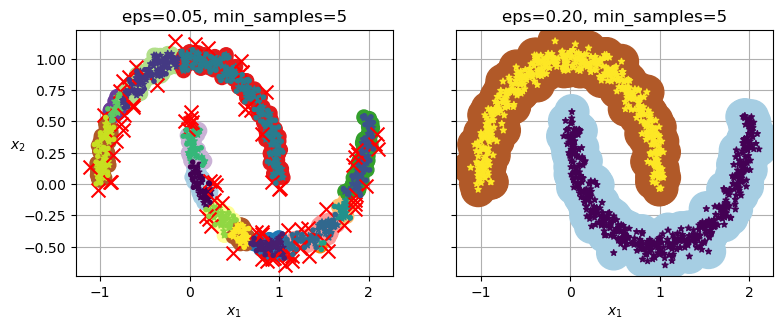

In [50]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

In [51]:
# predicting w/ dbscan and KNeighbors
from sklearn.neighbors import KNeighborsClassifier

dbscan = dbscan2
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])   

KNeighborsClassifier(n_neighbors=50)

In [52]:
# create and predict new data
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [53]:
knn.predict_proba(X_new)

array([[0.14, 0.86],
       [1.  , 0.  ],
       [0.22, 0.78],
       [1.  , 0.  ]])

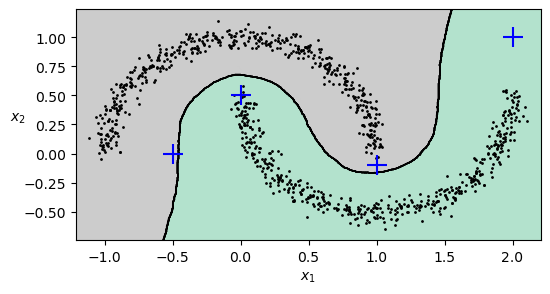

In [54]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

In [55]:
# Introducing a maximum distance
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

### A.6 Other Clustering Algorithms:

* Agglomerative Clustering
    * Hierarchy of clusters is built from the bottom up.
    * Think of many tiny bubbles floating on water and gradually attaching to each other until there’s one big group of bubbles.
        * At each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances).
* BIRCH (Balanced iterative reducing and clustering using hierarchies)
* Mean-shift
* Affinity Propagation
* Spectral Clustering
    * This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces the matrix’s dimensionality), then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn’s implementation uses k-means).

In [56]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [57]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [58]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [59]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

In [63]:
# Spectral Clustering:
from sklearn.cluster import SpectralClustering

X, y = make_moons(n_samples=1000, noise=0.05)

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)
sc1.affinity_matrix_.round(2)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [64]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


SpectralClustering(gamma=1, n_clusters=2, random_state=42)

C:\Users\JCA\AppData\Local\Temp\ipykernel_17880\1664780663.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired",


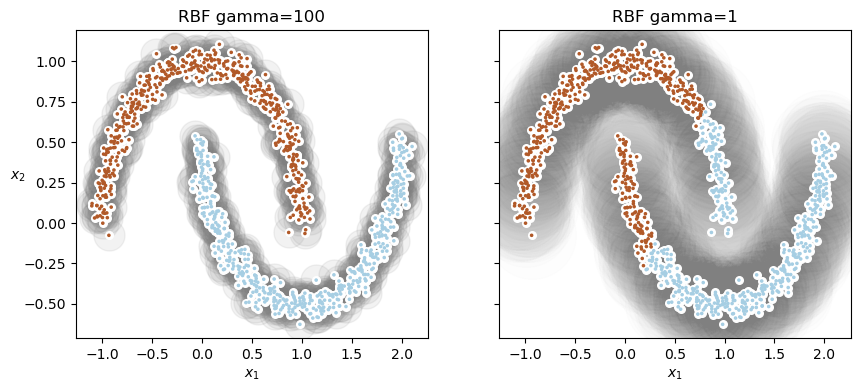

In [65]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired",
                alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")

plt.figure(figsize=(10, 4))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)